In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import *

In [4]:
PATH =  "C:\\Users\\mainp\\Documents\\1_stat\\data\\"

In [5]:
f = open(PATH + 'shipsnet.json')
dataset = json.load(f)
f.close()

In [6]:
images = np.array(dataset['data']).astype('uint8')
labels = np.array(dataset['labels']).astype('uint8')

In [7]:
x = images / 255.
x = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
print(x.shape)

(4000, 80, 80, 3)


In [8]:
class_names = ["no-ship","ship"]

class_name_labels = {class_name:i for i,class_name in enumerate(class_names)}

num_classes = len(class_names)
class_name_labels

n_labels = labels.shape[0]
_, count = np.unique(labels, return_counts=True)
df = pd.DataFrame(data = count)
df['Class Label'] = class_names
df.columns = ['Count','Class-Label']
df.set_index('Class-Label',inplace=True)
df

,Count
Class-Label,
no-ship,3000
ship,1000


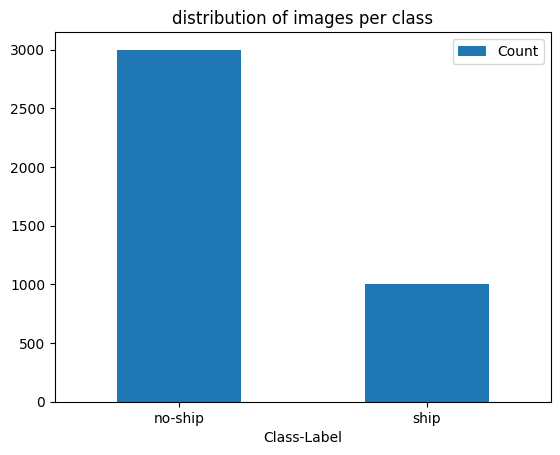

In [9]:
df.plot.bar(rot=0)
plt.title("distribution of images per class");

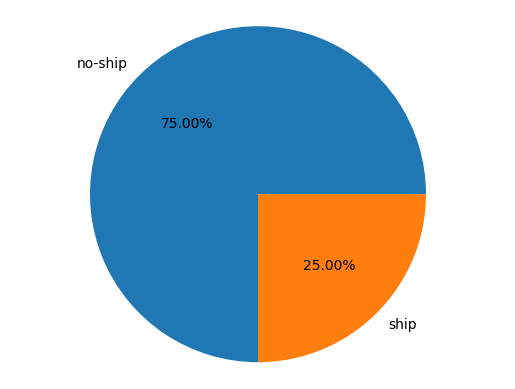

In [10]:
plt.pie(count,
       explode=(0,0),
       labels=class_names,
       autopct="%1.2f%%")
plt.axis('equal');

In [11]:
y = to_categorical(labels, num_classes=2)
print(y.shape)

(4000, 2)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42)

In [13]:
pip install keras.applications.resnet50v2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.applications.resnet50v2 (from versions: none)
ERROR: No matching distribution found for keras.applications.resnet50v2

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.models import Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD

from keras.applications.vgg19 import VGG19
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3

In [20]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications import DenseNet169
from keras.applications import EfficientNetB4
from keras.applications import NASNetLarge
from keras.applications import ConvNeXtBase


In [21]:
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
xception = Xception(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
inception_v3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
rn50v2 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
dn169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
enetb4 = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
nasnetl = NASNetLarge(weights='imagenet', include_top=False, input_shape=(80, 80, 3))
cnbase = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=(80, 80, 3))

350926856/350926856 [==============================] - 12s 0us/step


In [22]:
# Замораживание весов слоев модели
for layer in vgg19.layers:
    layer.trainable = False

for layer in xception.layers:
    layer.trainable = False

for layer in inception_v3.layers:
    layer.trainable = False

for layer in rn50v2.layers:
    layer.trainable = False

for layer in dn169.layers:
    layer.trainable = False

for layer in enetb4.layers:
    layer.trainable = False

for layer in nasnetl.layers:
    layer.trainable = False

for layer in cnbase.layers:
    layer.trainable = False

In [23]:
x1 = Flatten()(vgg19.output)
prediction1 = Dense(2, activation='softmax')(x1)

x2 = Flatten()(xception.output)
prediction2 = Dense(2, activation='softmax')(x2)

x3 = Flatten()(inception_v3.output)
prediction3 = Dense(2, activation='softmax')(x3)

x4 = Flatten()(rn50v2.output)
prediction4 = Dense(2, activation='softmax')(x4)

x5 = Flatten()(dn169.output)
prediction5 = Dense(2, activation='softmax')(x5)

x6 = Flatten()(enetb4.output)
prediction6 = Dense(2, activation='softmax')(x6)

x7 = Flatten()(nasnetl.output)
prediction7 = Dense(2, activation='softmax')(x7)

x8 = Flatten()(cnbase.output)
prediction8 = Dense(2, activation='softmax')(x8)

In [25]:
model_1 = Model(inputs=vgg19.input, outputs=prediction1)
model_2 = Model(inputs=xception.input, outputs=prediction2)
model_3 = Model(inputs=inception_v3.input, outputs=prediction3)
model_4 = Model(inputs=rn50v2.input, outputs=prediction4)
model_5 = Model(inputs=dn169.input, outputs=prediction5)
model_6 = Model(inputs=enetb4.input, outputs=prediction6)
model_7 = Model(inputs=nasnetl.input, outputs=prediction7)
model_8 = Model(inputs=cnbase.input, outputs=prediction8)

In [26]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_6.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_7.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_8.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
epochs = 10

history_1 = model_1.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 55s 612ms/step - loss: 0.2356 - accuracy: 0.9097 - val_loss: 0.1348 - val_accuracy: 0.9611
Epoch 2/10
90/90 [==============================] - 48s 532ms/step - loss: 0.1160 - accuracy: 0.9646 - val_loss: 0.0984 - val_accuracy: 0.9667
Epoch 3/10
90/90 [==============================] - 50s 554ms/step - loss: 0.0867 - accuracy: 0.9740 - val_loss: 0.0825 - val_accuracy: 0.9736
Epoch 4/10
90/90 [==============================] - 51s 570ms/step - loss: 0.0724 - accuracy: 0.9799 - val_loss: 0.0781 - val_accuracy: 0.9750
Epoch 5/10
90/90 [==============================] - 51s 565ms/step - loss: 0.0612 - accuracy: 0.9812 - val_loss: 0.0662 - val_accuracy: 0.9819
Epoch 6/10
90/90 [==============================] - 52s 583ms/step - loss: 0.0555 - accuracy: 0.9840 - val_loss: 0.0611 - val_accuracy: 0.9861
Epoch 7/10
90/90 [==============================] - 50s 551ms/step - loss: 0.0473 - accuracy: 0.9878 - val_loss: 0.0582 - val_accuracy: 0.9861

In [28]:
history_2 = model_2.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 25s 255ms/step - loss: 0.2754 - accuracy: 0.9288 - val_loss: 0.1546 - val_accuracy: 0.9694
Epoch 2/10
90/90 [==============================] - 22s 242ms/step - loss: 0.0944 - accuracy: 0.9792 - val_loss: 0.1091 - val_accuracy: 0.9736
Epoch 3/10
90/90 [==============================] - 22s 249ms/step - loss: 0.0695 - accuracy: 0.9830 - val_loss: 0.1071 - val_accuracy: 0.9736
Epoch 4/10
90/90 [==============================] - 22s 241ms/step - loss: 0.0432 - accuracy: 0.9906 - val_loss: 0.0850 - val_accuracy: 0.9778
Epoch 5/10
90/90 [==============================] - 22s 247ms/step - loss: 0.0289 - accuracy: 0.9951 - val_loss: 0.1147 - val_accuracy: 0.9722
Epoch 6/10
90/90 [==============================] - 21s 237ms/step - loss: 0.0318 - accuracy: 0.9941 - val_loss: 0.0917 - val_accuracy: 0.9736
Epoch 7/10
90/90 [==============================] - 22s 240ms/step - loss: 0.0234 - accuracy: 0.9951 - val_loss: 0.1383 - val_accuracy: 0.9736

In [29]:
history_3 = model_3.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 12s 104ms/step - loss: 0.2102 - accuracy: 0.9128 - val_loss: 0.0988 - val_accuracy: 0.9708
Epoch 2/10
90/90 [==============================] - 8s 88ms/step - loss: 0.0998 - accuracy: 0.9674 - val_loss: 0.0794 - val_accuracy: 0.9750
Epoch 3/10
90/90 [==============================] - 8s 90ms/step - loss: 0.0764 - accuracy: 0.9757 - val_loss: 0.0687 - val_accuracy: 0.9819
Epoch 4/10
90/90 [==============================] - 8s 92ms/step - loss: 0.0625 - accuracy: 0.9823 - val_loss: 0.0645 - val_accuracy: 0.9792
Epoch 5/10
90/90 [==============================] - 8s 87ms/step - loss: 0.0512 - accuracy: 0.9823 - val_loss: 0.0629 - val_accuracy: 0.9764
Epoch 6/10
90/90 [==============================] - 8s 89ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0569 - val_accuracy: 0.9764
Epoch 7/10
90/90 [==============================] - 8s 87ms/step - loss: 0.0380 - accuracy: 0.9913 - val_loss: 0.0595 - val_accuracy: 0.9778
Epoch 8/10


In [30]:
history_4 = model_4.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 22s 226ms/step - loss: 0.2005 - accuracy: 0.9563 - val_loss: 0.0780 - val_accuracy: 0.9806
Epoch 2/10
90/90 [==============================] - 19s 206ms/step - loss: 0.0315 - accuracy: 0.9934 - val_loss: 0.0740 - val_accuracy: 0.9847
Epoch 3/10
90/90 [==============================] - 18s 200ms/step - loss: 0.0162 - accuracy: 0.9965 - val_loss: 0.0592 - val_accuracy: 0.9875
Epoch 4/10
90/90 [==============================] - 18s 200ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0507 - val_accuracy: 0.9903
Epoch 5/10
90/90 [==============================] - 18s 200ms/step - loss: 2.8856e-04 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9903
Epoch 6/10
90/90 [==============================] - 19s 216ms/step - loss: 2.0413e-04 - accuracy: 1.0000 - val_loss: 0.0529 - val_accuracy: 0.9889
Epoch 7/10
90/90 [==============================] - 19s 215ms/step - loss: 1.5373e-04 - accuracy: 1.0000 - val_loss: 0.0531 - val_accu

In [31]:
history_5 = model_5.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 38s 373ms/step - loss: 0.1914 - accuracy: 0.9264 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 2/10
90/90 [==============================] - 33s 363ms/step - loss: 0.0473 - accuracy: 0.9826 - val_loss: 0.0409 - val_accuracy: 0.9833
Epoch 3/10
90/90 [==============================] - 32s 356ms/step - loss: 0.0327 - accuracy: 0.9903 - val_loss: 0.0412 - val_accuracy: 0.9819
Epoch 4/10
90/90 [==============================] - 32s 359ms/step - loss: 0.0168 - accuracy: 0.9965 - val_loss: 0.0330 - val_accuracy: 0.9875
Epoch 5/10
90/90 [==============================] - 32s 357ms/step - loss: 0.0112 - accuracy: 0.9990 - val_loss: 0.0292 - val_accuracy: 0.9875
Epoch 6/10
90/90 [==============================] - 32s 360ms/step - loss: 0.0092 - accuracy: 0.9993 - val_loss: 0.0281 - val_accuracy: 0.9875
Epoch 7/10
90/90 [==============================] - 32s 354ms/step - loss: 0.0083 - accuracy: 0.9993 - val_loss: 0.0280 - val_accuracy: 0.9889

In [32]:
history_6 = model_6.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 57s 530ms/step - loss: 1.2172 - accuracy: 0.6483 - val_loss: 0.5899 - val_accuracy: 0.7681
Epoch 2/10
90/90 [==============================] - 35s 388ms/step - loss: 0.6411 - accuracy: 0.6934 - val_loss: 0.5801 - val_accuracy: 0.7681
Epoch 3/10
90/90 [==============================] - 37s 413ms/step - loss: 0.6802 - accuracy: 0.6924 - val_loss: 0.5442 - val_accuracy: 0.7681
Epoch 4/10
90/90 [==============================] - 38s 423ms/step - loss: 0.7736 - accuracy: 0.6635 - val_loss: 0.9614 - val_accuracy: 0.7681
Epoch 5/10
90/90 [==============================] - 45s 501ms/step - loss: 0.7239 - accuracy: 0.6677 - val_loss: 0.5787 - val_accuracy: 0.7681
Epoch 6/10
90/90 [==============================] - 41s 453ms/step - loss: 0.7208 - accuracy: 0.6837 - val_loss: 0.7058 - val_accuracy: 0.7681
Epoch 7/10
90/90 [==============================] - 35s 392ms/step - loss: 0.6128 - accuracy: 0.7188 - val_loss: 0.6730 - val_accuracy: 0.7681

In [33]:
history_7 = model_7.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 93s 888ms/step - loss: 0.2124 - accuracy: 0.9344 - val_loss: 0.1027 - val_accuracy: 0.9764
Epoch 2/10
90/90 [==============================] - 74s 825ms/step - loss: 0.0847 - accuracy: 0.9875 - val_loss: 0.0864 - val_accuracy: 0.9806
Epoch 3/10
90/90 [==============================] - 77s 860ms/step - loss: 0.0578 - accuracy: 0.9920 - val_loss: 0.0791 - val_accuracy: 0.9833
Epoch 4/10
90/90 [==============================] - 74s 824ms/step - loss: 0.0612 - accuracy: 0.9910 - val_loss: 0.1314 - val_accuracy: 0.9819
Epoch 5/10
90/90 [==============================] - 73s 808ms/step - loss: 0.0518 - accuracy: 0.9934 - val_loss: 0.0884 - val_accuracy: 0.9819
Epoch 6/10
90/90 [==============================] - 70s 777ms/step - loss: 0.0294 - accuracy: 0.9979 - val_loss: 0.0600 - val_accuracy: 0.9833
Epoch 7/10
90/90 [==============================] - 73s 816ms/step - loss: 0.0298 - accuracy: 0.9986 - val_loss: 0.0621 - val_accuracy: 0.9833

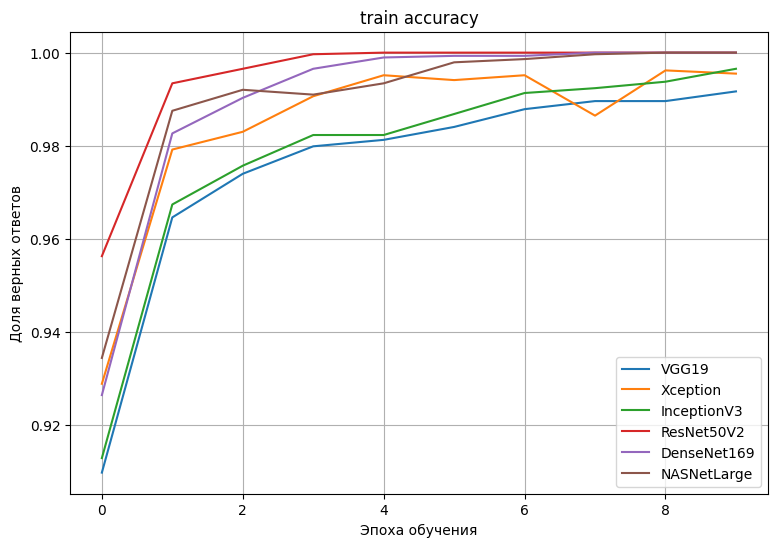

In [38]:
plt.figure(figsize=(9,6))
plt.title('train accuracy')
plt.plot(history_1.history['accuracy'], 
         label='VGG19')
plt.plot(history_2.history['accuracy'], 
         label='Xception')
plt.plot(history_3.history['accuracy'], 
         label='InceptionV3')
plt.plot(history_4.history['accuracy'], 
         label='ResNet50V2')
plt.plot(history_5.history['accuracy'], 
         label='DenseNet169')
# plt.plot(history_6.history['accuracy'], 
#          label='EfficientNetB4')
plt.plot(history_7.history['accuracy'], 
         label='NASNetLarge')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.grid()
plt.legend()
plt.show()

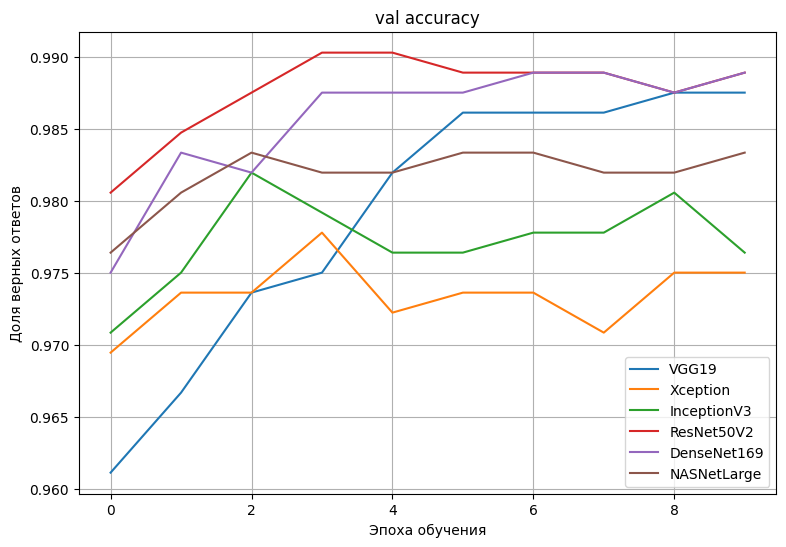

In [40]:
plt.figure(figsize=(9,6))
plt.title('val accuracy')
plt.plot(history_1.history['val_accuracy'], 
         label='VGG19')
plt.plot(history_2.history['val_accuracy'], 
         label='Xception')
plt.plot(history_3.history['val_accuracy'], 
         label='InceptionV3')
plt.plot(history_4.history['val_accuracy'], 
         label='ResNet50V2')
plt.plot(history_5.history['val_accuracy'], 
         label='DenseNet169')
# plt.plot(history_6.history['accuracy'], 
#          label='EfficientNetB4')
plt.plot(history_7.history['val_accuracy'], 
         label='NASNetLarge')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.grid()
plt.legend()
plt.show()

In [43]:
res_1 = model_1.evaluate(x_test, y_test)
res_2 = model_2.evaluate(x_test, y_test)
res_3 = model_3.evaluate(x_test, y_test)
res_4 = model_4.evaluate(x_test, y_test)
res_5 = model_5.evaluate(x_test, y_test)
res_6 = model_6.evaluate(x_test, y_test)
res_7 = model_7.evaluate(x_test, y_test)

13/13 [==============================] - 8s 612ms/step - loss: 0.1372 - accuracy: 0.9700
